
# Computational Statistics for Data Analysis (part II)


# Index

### 3 Probabilities. 
* 3.1 Probability rules
* 3.2 Monte Carlo
* 3.3 Continuous distribution
* 3.4 Central limit Theorem
* 3.5 Kernel density  (optional)

### 4 Estimation
* 4.1 Sample mean
* 4.2 Variance
* 4.3 Standard scores
* 4.4 Covariance (optional)
* 4.5 Pearson's correlation
* 4.6 Spearman's rank correlation
 


## 3 Probabilities  (frequentist point of view). 

The most common definition of **probability** is a *frequency expressed as a fraction* of the universe of possible outcomes. 

    Probability is a real value between 0 and 1 that is intended to be a measure corresponding to the idea that some things are more likely than others.

The *things* we assign probabilities to are called **events**, $E$.  A *situation* where $E$ might or might not happen is called a **trial**.

   In the case of a six-sided die, each roll is called a **trial**. If we want to compute $P(6)$, each time a 6 appears is called a **success**. Other trials are called **failures**. 

If in a *finite series of $n$ identical trials* we observe $s$ successes, the **probability of the success** is $s/n$.



## 3.1 Probability Rules 

A rule that is not always true: $P(A \mbox{ and } B) = P(A) P(B)$. 

It is true, when $A$ and $B$ are **independent**. 
$A$ and $B$ are **independent** if the fact that $A$ occurred, does not change the probability of $B$ and viceversa. Trials corresponding to tossing a coin are independent. 

A rule that is true when $A$ and $B$ are **not independent**: 

$$ P(A|B) = \frac{P(A \mbox{ and } B)}{P(B)}$$

From that we can derive: 

$$P(A \mbox{ and } B) = P(A) P(B|A) = P(B) P(A|B)$$

**Exercises**: 

+ If I have two children and we know that at least one of them is a girl, what is the probability that they are two girls?

In [ ]:
## Your solution here

### More probability rules

We say that two events are **mutually exclusive** if:

$$ P(A | B) = P(B | A) = 0 $$

In this case it is easy to show that:

$$ P(A \mbox{ or } B) = P(A) + P(B)$$

If $A$ and $B$ are not mutually exclusive:

$$ P(A \mbox{ or } B) = P(A) + P(B) - P(A \mbox{ and } B) $$

**Exercises**: Counting is the most basic skill to solve probability problems.

+ Q: If I roll two dice and the total is 8, what is the probability that one of the dice is 6?
+ Q: If I roll 100 dice, what is the probability of getting all sixes? 
+ Q: What is the probability of getting no sixes?

In [1]:
#Your solution here

## 3.2 Monte Carlo Experiments

**Monte Carlo experiments** are a broad class of computational algorithms that rely on *repeated random sampling to obtain numerical results*. Typically, one runs simulations many times over and over in order to obtain the distribution of an unknown probabilistic entity. 

**Trivial case**: What are the chances of getting a six in one trial?

In [ ]:
import random
import sys
N = 10000 # perform N experiments
M = 0 # counter of the number of times we got 6
for i in range(N):
    outcome = random.randint(1, 6)
    if outcome == 6:
        M += 1
Prob=M/N
print('I got six %d times out of %d' % (M, N), '; Prob = ', Prob)
print('Note that: 1/6=', 1/6.0)

What are the chances of getting (exactly) a six in two trials?

In [ ]:
# Intuitively
pA = 1/6*5/6 #prob of getting a 6 and any other number (except 6)
pB=5/6*1/6 #prob of getting 1-5 and a 6
pA_or_B=pA + pB
print(pA_or_B)

In [ ]:
# Solution with Monte Carlo experiments: 

N = 10000 # perform N experiments
M = 0 # counter of the number of times we got one 6 in two trials
for i in range(N):
    outcome1 = random.randint(1, 6)
    outcome2 = random.randint(1, 6)
    if (outcome1 == 6 and outcome2 !=6) or (outcome1 != 6 and outcome2 == 6):
        M += 1
print('I got one six %d times out of %d' % (M, N), '; Prob = ', M/N)

**Exercise**: You throw two dice, one black and one red. What is the probability
that the number of eyes on the black die is larger than the number of
eyes on the red die?

In [5]:
# Your solution with Monte Carlo here
import numpy as np

n = 10000

results = []

for i in range(n):
    red = np.random.randint(1, 7)
    black = np.random.randint(1, 7)

    results.append(black < red)

prob = sum(results) / len(results)
print(f"La probabilidad de que el dado negro sea mayor que el rojo es {prob:.2f}")

La probabilidad de que el dado negro sea mayor que el rojo es 0.42


## 3.4 Continuous distributions

So far, we have built **empirical distributions** (which represent the distributions of values in a sample), based on observations, but many real problems are well approximated by fitting **continous distributions functions**, which have an analytic formula. 

The graph of a continuous probability distribution is a **curve** called probability density function (**PDF**): 
* The area under the PDF for all possible values of the random variable is one, certainty. 
* The area under the PDF between two points corresponds to the probability that the variable falls between those two values, e.g. the area under the density curve between points a and b is equal to P(a < x < b). 

For continuous probability distributions, **probability is represented by area under the curve**, which is given by a different function called the cumulative distribution function (**CDF**). Mathematically, the CDF is the integral of the PDF, and the probability between two values of a continuous random variable will be the integral of the PDF between these two values: the area under the curve between these values. For continuous probability distributions, PROBABILITY = AREA.

There are many continuous probability distributions. When using a continuous probability distribution to model probability, the distribution used is selected to model and fit the particular situation in the best way. 



### 3.4.1 Uniform Distribution ###

The uniform probability distribution is one in which the probability of any outcome of a probability "experiment" is the same. 

This distribution is constant across an interval (a,b) and zero elsewhere. Since the area under the curve must be equal to 1, the lenght of the interval determines the height of the curve (i.e. 1/(b-a)).

In [ ]:
#x=np.linspace(-5,5,100)
x=np.arange(0,5,0.1)
ax = plt.subplot()
dist = getattr(stats,'uniform')(loc=0,scale=2)#uniform distribution on [loc, loc + scale].  
data = dist.rvs(size=1000)
y = dist.pdf(x)
ax.plot(x,y)

### 3.4.2 Binomial distribution

A binomial experiment is a statistical experiment that has the following properties:

* The experiment consists of $n$ repeated trials.
* Each trial can result in just two possible outcomes. We call one of these outcomes a success and the other, a failure.
* The probability of success, denoted by $p$, is the same on every trial.
* The trials are independent; that is, the outcome on one trial does not affect the outcome on other trials.

A binomial random variable is the number of successes $k$ in $n$ repeated trials of a binomial experiment. The probability distribution of a binomial random variable is called a **binomial distribution**.

The binomial probability refers to the probability that a binomial experiment of $n$ trials results in exactly $x$ successes. If the probability of success on an individual trial is $p$, then the binomial probability is:

$$ PMF(k) = {n \choose k} p^k (1-p)^{(n-k)}$$

where ${n \choose k} = \frac{n!}{k!(n-k)!}$ is the binomial coefficient.

What is the number of combinations of 2 items that can be selected from a set of 5 items? this can be estimated with the binomial coefficient: 

In [7]:
import scipy.special as sc
n = 5
k = 2
sc.comb(n, k, exact=True) # The number of combinations of n things taken k at a time.

10

What is the probability of having 5 heads in 9 trials?

In [ ]:
n=9
k=5
a = sc.comb(n, k, exact=True) # chances of 5 heads in 9 tosses
p = 0.5  #now we add the probability of a success
print('Prob: ', a * p**k * (1-p)**(n-k))

What are the chances of getting (exactly) a six in two trials?

In [10]:
n_comb = sc.comb(2, 1, exact  = True)
p = 1/6
print(n_comb * p ** 1 * (1-p)**(2-1))

0.2777777777777778


### 3.4.3 The exponential distribution

The exponential distribution is often concerned with *the amount of time until some specific event occurs*. There are a lot of real world events that can be described with this distribution: 
* The amount of time (beginning now) until an earthquake occurs, 
* The time it takes before your next telephone call,
* The value of the change that you have in your purse

The exponential distribution is widely used in the field of *reliability*. Reliability deals with the amount of time a product (such as a car battery) lasts

Values for an exponential random variable occur in the following way. There are fewer large values and more small values. For example, the amount of money customers spend in one trip to the supermarket follows an exponential distribution. There are more people who spend small amounts of money and fewer people who spend large amounts of money.


The CDF of the exponential distribution is:

$$ CDF(x) = 1 -  \exp^{- \lambda x}$$ 

And its PDF is:

$$ PDF(x) = \lambda \exp^{- \lambda x}$$

The parameter $\lambda$ determines the shape of the distribution; the mean of the distribution is $1/\lambda$, which is the same as its standard deviation. The median is $ln(2)/\lambda$.

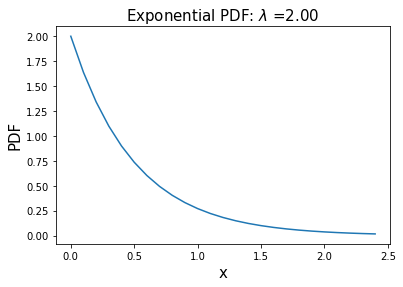

In [12]:
from __future__ import division
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

lam = 2
x=np.arange(0,2.5,0.1)
y= lam * np.exp(-lam*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f' % lam, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

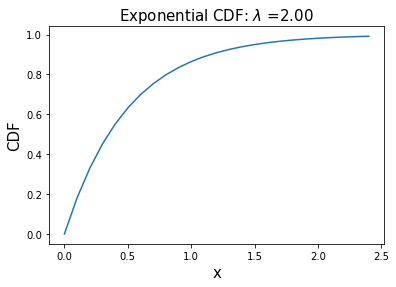

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lam = 2
x=np.arange(0,2.5,0.1)
y= 1 - np.exp(-lam*x)
plt.plot(x,y,'-')
plt.title('Exponential CDF: $\lambda$ =%.2f' % lam ,fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

**Exercise**: The number of days ahead travelers purchase their airline tickets can be modeled by an exponential distribution with the average amount of time equal to 15 days. Find the probability that a traveler will purchase a ticket fewer than ten days in advance. How many days do half of all travelers wait?


In [21]:
average = 15
lam = 1 / average

print(f"La probabilidad de 10 días o menos es: {1 - np.exp(-lam*10)}") #Se calcula con la acumulada

median = np.log(2) / lam
print(f"La mitad de los viajeros esperan {median} días.")

La probabilidad de 10 días o menos es: 0.486582880967408
La mitad de los viajeros esperan 10.39720770839918 días.


In [47]:
###INCISO DEL CUMPLEAÑOS DE EMILIO
##PROBABILIDAD DE QUE EN UN GRUPO DE PERSONAS HAYA POR LO MENOS DOS QUE CUMPLAN AÑOS EL MISMO DIA
alumnos = 40

n = 100000
results = []

for i in range(n):
    cumpleaños = np.random.randint(1,366, size = (alumnos,))
    
    _, counts = np.unique(cumpleaños, return_counts = True)

    results.append(any(counts  > 1))

prob = sum(results) / len(results)
print(f"La probabilidad de que en un grupo de {alumnos} personas dos cumplan años el mismo día es: {prob} +- {np.std(results) / len(results)}")


La probabilidad de que en un grupo de 40 personas dos cumplan años el mismo día es: 0.89063 +- 3.1210287262375526e-06


**Exercise** On average, a certain computer part lasts ten years. The length of time the computer part lasts is exponentially distributed.

What is the probability that a computer part lasts more than 7 years?


In [ ]:
# Your solution here

### 3.4.4 The poisson distribution

A *Poisson* random variable is typically used to model the number of times an event happened in a time interval. For example, the number of users visited on a website in an interval can be thought of a Poisson process. Poisson distribution is described in terms of the rate ($\mu$) at which the events happen. An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$. The probability of observing $k$ events in an interval is given by the equation:

$$ PDF(k) = \exp(-\lambda)\frac{\lambda^k}{k!}$$

Text(0, 0.5, 'PDF')

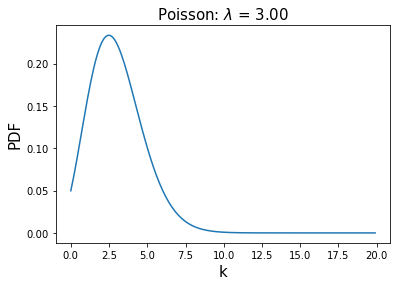

In [34]:
from scipy.special import factorial

lam = 3
k=np.arange(0,20,0.1)
y= np.exp(-lam)*np.power(lam,k)/factorial(k)

plt.plot(k,y,'-')
plt.title('Poisson: $\lambda$ = %.2f' % lam ,fontsize=15)
plt.xlabel('k',fontsize=15)
plt.ylabel('PDF',fontsize=15)

### 3.4.5 The normal distribution

The **normal, or Gaussian distribution** is often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the *central limit theorem*: 

> Under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. 

Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.

Also, Gaussian distributions have some unique properties that are valuable in **analytic studies**. For instance, any linear combination of a fixed collection of normal deviates is a normal deviate. Many results and methods, such as propagation of uncertainty and least squares parameter fitting, can be derived analytically in explicit form when the relevant variables are normally distributed.

A normal distribution has a bell-shaped density curve described by its mean $\mu$ and standard deviation $\sigma$. The density curve is symmetrical, centered about its mean, with its spread determined by its standard deviation showing that data near the mean are more frequent in occurrence than data far from the mean. Its CDF has no closed-form expression and its more common representation is the PDF, which, at a given point $x$ is given by: 

$$ PDF(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)$$


In [ ]:
u=5 # mean
s=1 # standard deviation
x=np.arange(0,15,0.1)
y=(1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

Examples:

    * Measures of size of living tissue (length, height, skin area, weight);
    * The length of inert appendages (hair, claws, nails, teeth) of biological specimens, in the direction of growth; presumably the thickness of tree bark also falls under this category;
    * Certain physiological measurements, such as blood pressure of adult humans.


There exist much more distributions as: 
- the Pareto distribution (describing e.g. the distribution of wealth, cities sizes, sand particles, forest fires and earthquakes,
- the lognormal distribution (describing the adult weights), etc.

You generate generate random numbers following a wide suite of distributions using <code>scipy.stats</code> modules and visualize their histogram and density plot using seaborn's <code>distplot</code>:

https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

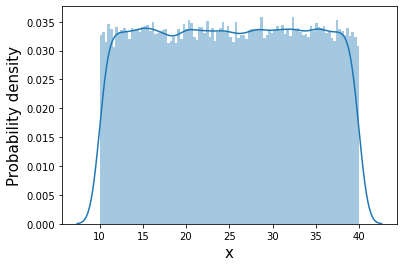

In [44]:
import seaborn as sns  

from scipy.stats import uniform

a = 10
b = 20
data_uniform = uniform.rvs(size=100000, loc=a, scale=a+b) #Generate random numbers following the given distribution
ax = sns.distplot(data_uniform,
                  bins=100,
                  kde=True)  #include the density plot
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

### 3.5 Central Limit Theorem

In probability theory, the Central Limit Theorem states that:

> Take the mean of $n$ random samples from ANY arbitrary distribution with a $well$ $defined$ standard deviation $\sigma$ and mean $\mu$. As $n$ gets bigger the **distribution of the sample mean** will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$.

Colloquially speaking, the theorem states the distribution of an average tends to be normal, even when the distribution from which the average is computed is decidedly non-normal. This explains the ubiquity of the Gaussian distribution in science and statistics. 

#### Example: Uniform Distribution

The uniform distribution is obviously non-normal.  Let's call it the $parent$ $distribution$.

To compute an average, two samples are drawn ($n=2$), at random, from the parent distribution and averaged. Then another sample of two is drawn and another value of the average computed.  This process is repeated, over and over, and averages of two are computed.  

Repeatedly taking more elements ($n = 3,4...$) from the parent distribution, and computing the averages, produces a normal probability density.

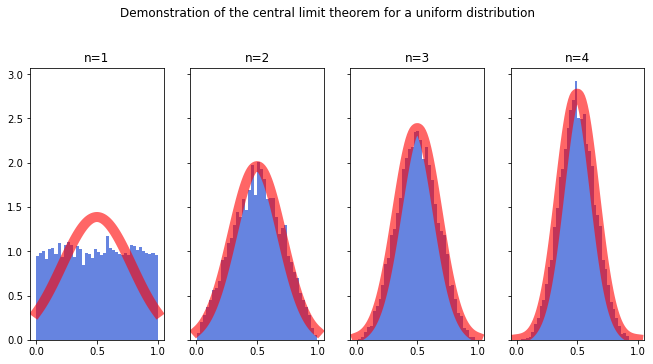

In [45]:
from scipy.stats import uniform

fig, ax = plt.subplots(1, 4, sharey=True, squeeze=True, figsize=(11, 5))
x = np.linspace(0, 1, 100)
for i in range(4): 
    f = np.mean(uniform.rvs(size=(10000, i+1)),1)
    m, s = np.mean(f), np.std(f, ddof=1)
    fn = (1/(s*np.sqrt(2*np.pi)))*np.exp(-(x-m)**2/(2*s**2))  # normal pdf            
    ax[i].hist(f, 40, density=True, color=[0, 0.2, .8, .6]) 
    ax[i].set_title('n=%d' %(i+1))
    ax[i].plot(x, fn, color=[1, 0, 0, .6], linewidth=10)
    
plt.suptitle('Demonstration of the central limit theorem for a uniform distribution', y=1.05)
plt.show()

The Central Limit Theorem explains the importance of normal distributions in the real world. Many features and properties of the living beings depend on genetic and environmental factors which effect usually is additive. The measured features are the sum of many small effects that not necessarily follow the normal distributions, but their sum does follow according to the Central Limit Theorem.

## 3.6 Kernel density estimates 

In some instances, we may not be interested in the parameters of a particular distribution of data, but on just a **continous representation** of the data at hand. In this case, we can estimate the distribution non-parametrically (i.e. making no assumptions about the form of the underlying distribution) using kernel density estimation.

> In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. 

Several uses are defined:

- Visualization - to explore the data by visualizing them and decide whether an estimated PDF is an appropriate model for the distribution.

- Interpolation - if we have reasons to beleive that the distribution is smooth, we can apply the KDE to interpolate the density specially for values that were not sampled.

- Simulation - specially when the sample distribution is small, it would be convenient to smooth the sample distribution by KDE in order to simulate and explore more possible outcomes, rather than replicating the observed data.

Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution and adjust a KDE:

In [ ]:
# Create a bimodal distribution with a mixture of Normals.
from scipy.stats import norm

x1 = norm.rvs(size=100,loc=0,scale=3) # parameters (size=None,loc=mean,scale=stdev)
x2 = norm.rvs(size=50,loc=8,scale=1)

# Append by row
x = np.r_[x1, x2] # r_ Translates slice objects to concatenation along the first axis.

#The simplest non-parametric technique for density estimation is the histogram.
plt.hist(x, bins=8, density=True)
plt.show()

The histogram above is discontinuous. To compute a continuous probability density function, we can use a KDE.

**How?** A normal kernel is placed on each of the data points xi and the kernels are then summed to make the kernel density estimate. 

<code>SciPy</code> implements a Gaussian KDE that automatically chooses an appropriate bandwidth following Scott's rule:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#ra3a8695506c7-3

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
plt.plot(xgrid, density(xgrid), 'r-')
plt.show()

Kernel bandwidth selection strongly influences the estimate obtained from the KDE (much more so than the actual shape of the kernel). The bandwidth acts as a smoothing parameter, controlling the tradeoff between bias and variance in the result: a large bandwidth leads to a very smooth (i.e. high-bias) density distribution, while a small bandwidth leads to an unsmooth (i.e. high-variance) density distribution.

In [ ]:
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=18, density=True)
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,3)))
for bandwidth in [0.1, 0.2, 0.6]:
    density = kde.gaussian_kde(x,bandwidth) # Estimate the densities
    plt.plot(xgrid, density(xgrid),color=next(colors), label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))
    
    
    #ax.plot(kde.support, kde.density, '--', lw=2, color='k', zorder=10, label='KDE from samples, bw = {}'.format(round(bandwidth, 2)))

The Gaussian KDE is the most widely used, but several other kernels are also available from <code>statsmodels</code> and <code>sklearn</code>:

In [ ]:
from statsmodels.nonparametric.kde import kernel_switch
list(kernel_switch.keys())

In [ ]:
from sklearn.neighbors import KernelDensity

# Plot all available kernels

kernels = ['cosine', 'epanechnikov', 'exponential', 'gaussian', 'linear', 'tophat']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))

for k, ind in zip(kernels, plt_ind):
    kde_model = KernelDensity(kernel=k)
    kde_model.fit([[0]]) # Build a model using a sample of only one value, for example, 0.
    score = kde_model.score_samples(np.arange(-2, 2, 0.1)[:, None]) # estimate the density of all points around zero
    plt.subplot(ind)
    plt.fill(np.arange(-2, 2, 0.1)[:, None], np.exp(score), c='blue') #plot the density along the y-axis
    plt.title(k)

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()


## 4 Estimation




Let's think of a sequence of values: 
[-0.441, 1.774, -0.101, -1.138, 2.975, -2.138].

Can you guess which is the distribution? For example what would be its mean?

Hint: assume that it is normal distribution.

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -2.138])
print(x.mean())

Since we usually do not know the true population properties, we can try our best to define estimators of those properties from the sample set using a similar construction.

> **Estimation** is the process of inferring the parameters (e.g. mean) of a distribution from a statistic of samples drown from a population. 

For example: What is the estimated mean $\hat{\mu}$ of the following normal data?

In [ ]:
x = np.random.normal(0.0, 1.0, 10000)
a = plt.hist(x,50,density='True')

We can use our definition of empirical mean:

In [ ]:
print('The empirical mean of the sample is ', x.mean())

Let us imagine that we were reported the following data, where probably one of the data (the last item) is wrong:
    

In [ ]:
x=np.array([-0.441, 1.774, -0.101, -1.138, 2.975, -213.8])
print(x.mean())

Is the mean estimator good enough? The median is also an estimator (more robust to outliers)

### 4.1 Sample mean


"Is median better than sample mean?" it depends, we can use two different objectives to answer this question: the *minimization of error* or the *maximization to get the right answer*. 
   * The median may be a better indicator of the most typical value if a set of scores has an outlier. 
   * If there are no outliers, we can use the **sample mean** to minimize **mean squared error** (where $m$ is the number of times you play the estimation game, not the size of the sample!):

$$ MSE = \frac{1}{m} \sum(\hat{\mu} - \mu)^2$$




In [ ]:
err = 0.0
mu=0.0
NTests=1000
var=1.0
NPoints=100000
for i in range(NTests):
    x = np.random.normal(mu, var, NPoints)
    err += (mu - x.mean())**2

print('MSE: ', err/NTests) 

### 4.2 Sample variance

We can also estimate the variance with:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_i (x_i - \mu)^2 $$

This estimator works for large samples, but it is biased for small samples. We can  use $n − 1$ instead of $n$ in the formula to correct for this bias:

$$ \hat{\sigma}^2_{n-1} = \frac{1}{n-1} \sum_i (x_i - \mu)^2 $$


### 4.3 Standard scores

A standard score or **Z-score** is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean. It is computed as: 

$$ z_i = \frac{x_i - \mu}{\sigma}$$

This measure is dimensionless and its distribution has mean 0 and variance 1.

It inherits the "shape" of $X$: if it is normally distributed, so is $Z$. If $X$ is skewed, so is $Z$.

### 4.4 Covariance 

Sometimes it would be of interest to measure the relationship between two variables. 

**Covariance** is a measure of the tendency of two variables to vary together. If we have two series $X$ and $Y$ with $X=\{x_i\}$ and $Y=\{y_i\}$, their covariance is the expected value (or mean) of the product of their deviations from their individual expected values:

$$ Cov(X,Y) = \frac{1}{n} \sum (x_i - \mu_X)*(y_i - \mu_Y), $$

where $n$ is the length of the two series.

The *sign of the covariance therefore shows the tendency in the linear relationship between the variables*. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (i.e., the variables tend to show opposite behavior), the covariance is negative. 

The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. The normalized version of the covariance, the correlation coefficient, however, shows by its magnitude the strength of the linear relation.

<center><img src="images/covariance_sign.png" width="500" height="300"></center>

In [50]:
def Cov(X, Y):
    def _get_dvis(V):
        return [v - np.mean(V) for v in V]
    dxis = _get_dvis(X)
    dyis = _get_dvis(Y)
    return np.sum([x * y for x, y in zip(dxis, dyis)])/len(X)

X = [5, -1, 3.3, 2.7, 12.2]
Y=[10,12,8,9,11]

print("Cov(X, X) = %.2f" % Cov(X, X))
print("Var(X) = %.2f" % np.var(X))

print( "Cov(X, Y) = %.2f" % Cov(X, Y))


Cov(X, X) = 18.89
Var(X) = 18.89
Cov(X, Y) = 0.18


### 4.5 Pearson's Correlation

Pearson's correlation coefficient $\rho$ is a measure of the strength of the linear association between two variables. It also takes into account the standard deviation $\sigma$ to measure the relationship among variables:
 
$$ \rho = \frac{1}{n} \sum p_i = \frac{1}{n} \sum  \frac{(x_i - \mu_X)}{\sigma_X} \frac{(y_i - \mu_Y)}{\sigma_Y}  $$

Or we can rewrite $\rho$ by factoring out $\sigma_X$ and $\sigma_Y$:

$$ \rho = \frac{Cov(X,Y)}{\sigma_X \sigma_Y}$$

 


In [51]:
def Corr(X, Y):
    assert len(X) == len(Y)
    return Cov(X, Y) / np.prod([np.std(V) for V in [X, Y]])

print("Corr(X, X) = %.5f" % Corr(X, X))

Y=np.random.random(len(X))

print("Corr(X, Y) = %.5f" % Corr(X, Y))

Corr(X, X) = 1.00000
Corr(X, Y) = -0.00954


When $\rho = 0$, we cannot say that there is no relationship between the variables!

Pearson's coefficient only measures **linear** correlations!

### 4.6 Spearman’s rank correlation

Pearson’s correlation works well if the relationship between variables is linear and if the variables are roughly normal. But it is not robust in the presence of **outliers**. Spearman’s rank correlation is an alternative that mitigates the effect of outliers and skewed distributions. 

* To compute Spearman’s correlation, we have to compute the rank of each value, which is its index in the sorted sample. For example, in the sample {7, 1, 2, 5} the rank of the value 5 is 3, because it appears third if we sort the elements. Then, we compute the Pearson’s correlation, **but for the ranks**.

* Spearman's correlation coefficient, $\rho_s$ measures the strength and direction of association between two ranked variables. While Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

In [52]:
def list2rank(l):
    #l is a list of numbers
    # returns a list of 1-based index; mean when multiple instances
    return [np.mean([i+1 for i, sorted_el in enumerate(sorted(l)) if sorted_el == el]) for el in l]

l = [7, 1, 2, 5]
print("ranks: ", list2rank(l))

def spearmanRank(X, Y):
    # X and Y are same-length lists
    return Corr(list2rank(X), list2rank(Y))

X = [1, 2, 3, 4, 100]
Y = [5, -100, 7, 10, 9]

print("Pearson rank coefficient: %.2f" % Corr(X, Y))
print("Spearman rank coefficient: %.2f" % spearmanRank(X, Y))



ranks:  [4.0, 1.0, 2.0, 3.0]
Pearson rank coefficient: 0.27
Spearman rank coefficient: 0.80


Anscombe’s quartet consists of four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x, y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

**Exercise:** Load the Anscombe's quartet (file <code>anscombe.csv</code> from the files directory) and obtain the covariance, Pearson's correlation and Spearman's rank correlation from each pair

(Source: https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
<center><img src="images/Anscombe's_quartet.png" width="600" height="300"></center>

In [ ]:
#Your solution here

Here we implemented the correlation metrics by hand, but note these metrics are also implemented in python <code>scipy.stats.pearsonr</code> and <code>scipy.stats.spearmanr</code>. Check them out!

As a bonus, these functions also provide the p-values for testing non-correlation. We'll learn about p-values in the statistical inference session. 